## HOJA DE RESPUESTA TRABAJO PRACTICO 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

MG = pd.read_excel("16_MATRICULAS_ED_SUPERIOR_MAGALLANES_2021.xlsx")

### ITEM 1

#### 1. Estudien la correlación entre el valor de la matrícula y el valor del arancel para toda la base de datos y luego separen por tipo de institución. ¿Los grupos se comportan parecido? ¿Vale la pena estudiar todos los grupos? Visualicen apropiadamente.

Correlacion total entre el valor de la matricula y el valor del arancel: 0.02
Correlacion entre el valor de la matricula y el valor del arancel en el tipo de institucion Universidades CRUCH: 0.19
Correlacion entre el valor de la matricula y el valor del arancel en el tipo de institucion Universidades Privadas: nan
Correlacion entre el valor de la matricula y el valor del arancel en el tipo de institucion Institutos Profesionales: 0.81
Correlacion entre el valor de la matricula y el valor del arancel en el tipo de institucion Centros de Formacion Tecnica: 0.84


c:\Users\Magol\OneDrive\Pictures\Desktop\Estadistica\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Magol\OneDrive\Pictures\Desktop\Estadistica\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Magol\AppData\Local\Temp\ipykernel_3956\3435346334.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlación', y='Tipo Institución', data=df_corr, palette='viridis')


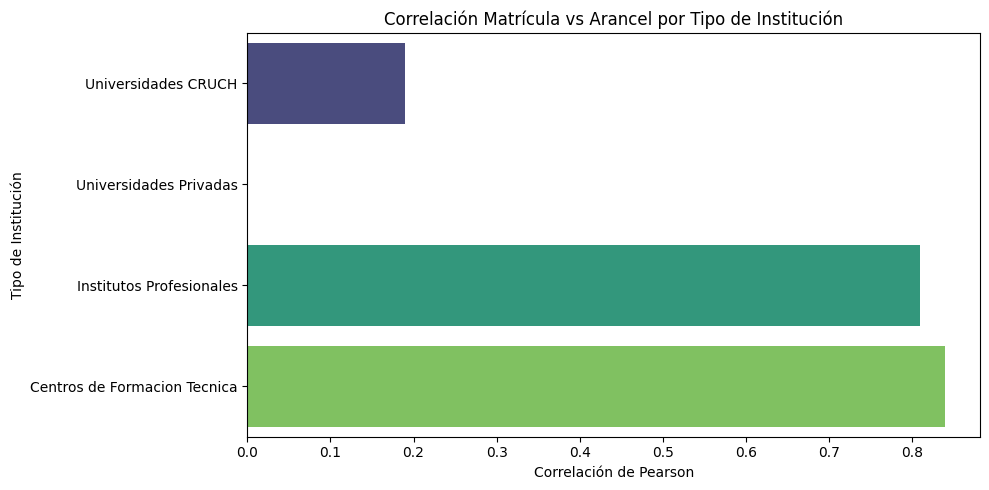

In [13]:
correlacion_total = round(MG['VALOR MATRICULA (PESOS)'].corr(MG['VALOR ARANCEL (PESOS)']), 2)
print(f"Correlacion total entre el valor de la matricula y el valor del arancel: {correlacion_total}")

correlaciones_por_tipo = {}

for tipo_institucion in MG['TIPO DE INSTITUCION'].unique():
    MG_tipo = MG[MG['TIPO DE INSTITUCION'] == tipo_institucion]
    correlacion_tipo = round(MG_tipo['VALOR MATRICULA (PESOS)'].corr(MG_tipo['VALOR ARANCEL (PESOS)']), 2)
    correlaciones_por_tipo[tipo_institucion] = correlacion_tipo
    print(f"Correlacion entre el valor de la matricula y el valor del arancel en el tipo de institucion {tipo_institucion}: {correlacion_tipo}")

df_corr = pd.DataFrame(list(correlaciones_por_tipo.items()), columns=['Tipo Institución', 'Correlación'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Correlación', y='Tipo Institución', data=df_corr, palette='viridis')
plt.xlabel('Correlación de Pearson')
plt.ylabel('Tipo de Institución')
plt.title('Correlación Matrícula vs Arancel por Tipo de Institución')
plt.tight_layout()
plt.show()

#### 2. ¿Cuál es la relación entre el arancel y la duración de la carrera correspondiente? ¿Es verdad que, mientras más larga la carrera, más cara? ¿Será igual en todas las áreas del conocimiento?


Correlación global entre arancel y duración: -0.11

Correlación por área del conocimiento:
Administracion y Comercio: -0.29
Educacion: 0.54
Tecnologia: -0.18
Salud: 0.13
Ciencias Sociales: 0.84
Agropecuaria: 0.46
Arte y Arquitectura: -0.81
Ciencias Basicas: -0.89
Derecho: nan


c:\Users\Magol\OneDrive\Pictures\Desktop\Estadistica\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


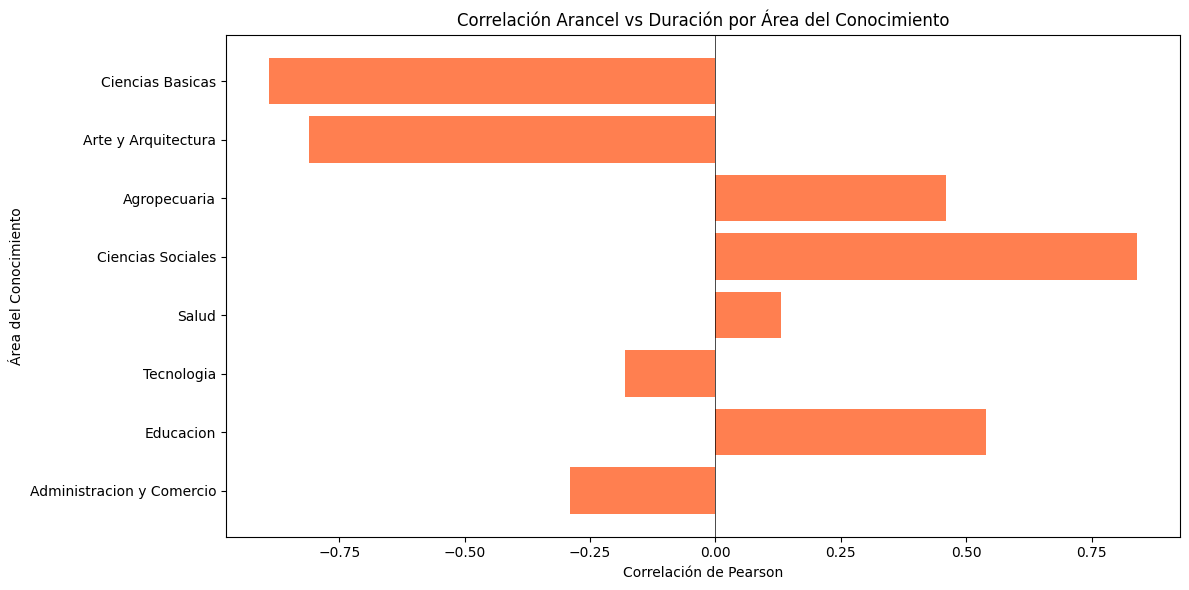

In [15]:
# Correlación global entre arancel y duración
correlacion_arancel_duracion = round(MG['VALOR MATRICULA (PESOS)'].corr(MG['DURACION TOTAL CARRERA (SEMESTRES)']), 2)
print(f"\nCorrelación global entre arancel y duración: {correlacion_arancel_duracion}")

# Correlación por área del conocimiento
print("\nCorrelación por área del conocimiento:")
correlaciones_por_area = {}

for area in MG['AREA CONOCIMIENTO'].unique():
    MG_area = MG[MG['AREA CONOCIMIENTO'] == area]
    correlacion_area = round(MG_area['VALOR MATRICULA (PESOS)'].corr(MG_area['DURACION TOTAL CARRERA (SEMESTRES)']), 2)
    correlaciones_por_area[area] = correlacion_area
    print(f"{area}: {correlacion_area}")

# Gráfico de barras - Correlaciones por área
plt.figure(figsize=(12, 6))
plt.barh(list(correlaciones_por_area.keys()), list(correlaciones_por_area.values()), color='coral')
plt.xlabel('Correlación de Pearson')
plt.ylabel('Área del Conocimiento')
plt.title('Correlación Arancel vs Duración por Área del Conocimiento')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### ITEM 2

#### 1. ¿Se produjo una gran vuelta a la presencialidad o los formatos que incluyen la no presencialidad han ganado terreno?

In [4]:
modality_counts = MG['MODALIDAD'].value_counts()
modality_percentages = MG['MODALIDAD'].value_counts(normalize=True) * 100

# Mostrar los resultados
print("Cuenta de modalidades:")
print(modality_counts)
print("\nPorcentaje de modalidades:")
print(modality_percentages)

Cuenta de modalidades:
MODALIDAD
Presencial        5794
Semipresencial       2
Name: count, dtype: int64

Porcentaje de modalidades:
MODALIDAD
Presencial        99.965493
Semipresencial     0.034507
Name: proportion, dtype: float64


Se puede concluir que sí se produjo una gran vuelta a la presencialidad (o la presencialidad se mantuvo como el formato dominante antes de la pandemia), ya que el 99.97% de las matrículas correspondieron a la modalidad Presencial.

Los formatos que incluyen la no presencialidad (Semipresencial y A Distancia) tienen una participación prácticamente nula en el total de matrículas de la región para ese año.

#### 2. ¿Qué tipo de institución emplea de mayor manera formatos no exclusivamente presenciales?

#### 3. ¿Cuál es la probabilidad de seleccionar de los estudiantes hombres de la región a uno del área de educación? ¿Cuál es la probabilidad de seleccionar de las estudiantes mujeres de la región a una del área de educación? ¿Hay una discrepancia aparente? ¿Cómo se explica?

In [21]:
# Calculando Prob Hombre del área de educación
MG_Genero = MG[MG['GENERO'] == "Masculino"]
prob_areas = MG_Genero['AREA CONOCIMIENTO'].value_counts(normalize=True)
prob_final = prob_areas.get('Educacion')

print(f"Probabilidad de ser del área de educación (dado que es Hombre): {prob_final:.2%}")

# Calculando Prob Mujer del área de educación
MG_Genero = MG[MG['GENERO'] == "Femenino"]
prob_areas = MG_Genero['AREA CONOCIMIENTO'].value_counts(normalize=True)
prob_final = prob_areas.get('Educacion')

print(f"Probabilidad de ser del área de educación (dado que es Mujer): {prob_final:.2%}")

print("""
Hay una gran discrepancia entre hombres y mujeres, esto debido a la diferencia porcentual entre ambos géneros. 
Siendo las mujeres las que lideran esta área de conocimiento.
""")

Probabilidad de ser del área de educación (dado que es Hombre): 6.36%
Probabilidad de ser del área de educación (dado que es Mujer): 15.07%

Hay una gran discrepancia entre hombres y mujeres, esto debido a la diferencia porcentual entre ambos géneros. 
Siendo las mujeres las que lideran esta área de conocimiento.

